# Support Vector Regression

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

### No blank cells.
### Removed date column since not needed.
### Column 2 is dependent variable.
### Remaining columns are independent variables.

In [4]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00618/Steel_industry_data.csv')
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

## Check for missing values in dataset

In [5]:
missing = dataset.isnull().sum()
print('Below output shows the number of empty cells in each column')
print(missing)

Below output shows the number of empty cells in each column
date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


## Check for data type of each column to identify and encode categorical data

In [6]:
dataset.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [7]:
print(X)

[[2.95 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [4.46 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.28 0.0 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 ...
 [3.17 0.07 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.06 0.11 0.0 ... 'Weekday' 'Monday' 'Light_Load']
 [3.02 0.07 0.0 ... 'Weekday' 'Monday' 'Light_Load']]


In [8]:
print(y)

[3.17 4.   3.24 ... 3.78 3.78 3.67]


## Encoding categorical data

Convert week status column using label encoder since only 2 values weekday and weekend present.

In [9]:
print('before label encoding')
print(X[:, 6])

before label encoding
['Weekday' 'Weekday' 'Weekday' ... 'Weekday' 'Weekday' 'Weekday']


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 6] = le.fit_transform(X[:, 6])

In [11]:
print('after label encoding')
print(X[:, 6])

after label encoding
[0 0 0 ... 0 0 0]


Convert both columns day of week and type of load using one hot encoding.

In [12]:
print('before one hot encoding')
print(X[:, 7:9])

before one hot encoding
[['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ...
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']
 ['Monday' 'Light_Load']]


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7, 8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
print('after one hot encoding')
print(X[:, :10])

after one hot encoding
[[0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 ...
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]
 [0.0 1.0 0.0 ... 1.0 0.0 0.0]]


## Feature scaling for X and y

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_svr = sc_X.fit_transform(X)
print(X_svr)

[[-0.40759561  2.42627131 -0.40759561 ...  0.51326762 -1.67801526
  -0.63124277]
 [-0.40759561  2.42627131 -0.40759561 ...  0.51326762 -1.64192891
  -0.63124277]
 [-0.40759561  2.42627131 -0.40759561 ...  0.51326762 -1.60584256
  -0.63124277]
 ...
 [-0.40759561  2.42627131 -0.40759561 ...  0.51261093  1.67801526
  -0.63124277]
 [-0.40759561  2.42627131 -0.40759561 ...  0.51195425  1.71410161
  -0.63124277]
 [-0.40759561  2.42627131 -0.40759561 ...  0.51261093 -1.71410161
  -0.63124277]]


In [16]:
y = y.reshape(len(y),1)
sc_y = StandardScaler()
y_svr = sc_y.fit_transform(y)
print(y_svr)

[[-0.72410486]
 [-0.69928718]
 [-0.72201181]
 ...
 [-0.70586536]
 [-0.70586536]
 [-0.70915445]]


## Split dataset for SVR model

In [17]:
from sklearn.model_selection import train_test_split
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size = 0.2, random_state = 0)

## Training the training dataset for support vector regression

In [18]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel= 'rbf')
regressor_svr.fit(X_train_svr, y_train_svr)

C:\Users\prade\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting for test data

In [19]:
y_pred_svr = sc_y.inverse_transform(regressor_svr.predict(X_test_svr).reshape(-1,1))
np.set_printoptions(precision=2)
y_test_original = sc_y.inverse_transform(y_test_svr)
print(y_pred_svr, '\n')
print(y_test_original, '\n')

[[40.35]
 [ 4.52]
 [ 4.45]
 ...
 [88.61]
 [ 4.26]
 [ 3.47]] 

[[54.22]
 [ 3.67]
 [ 4.03]
 ...
 [88.63]
 [ 3.13]
 [ 3.31]] 



## Calculating Mean Square Error (MSE) in Support Vector Regression

In [20]:
error_svr = y_pred_svr - y_test_original
square_error_svr = error_svr ** 2
add_square_error_svr = 0
for i in square_error_svr:
    add_square_error_svr += i
sum_square_error_svr = add_square_error_svr
mean_square_error_svr = sum_square_error_svr / len(y_pred_svr)
print('Mean Square Error (MSE) is: ', mean_square_error_svr)

Mean Square Error (MSE) is:  [5.22]


## Calculating Root Mean Square Error (RMSE) in Support Vector Regression

In [21]:
from math import sqrt
root_mean_square_error_svr = sqrt(mean_square_error_svr)
print('Root Mean Square Error (RMSE) is: ', root_mean_square_error_svr)

Root Mean Square Error (RMSE) is:  2.285376870692209


## Calculating Mean Absolute Error (MAE) in Support Vector Regression

In [22]:
absolute_error_svr = abs(error_svr)
add_absolute_error_svr = 0
for i in absolute_error_svr:
    add_absolute_error_svr += i
sum_absolute_error_svr = add_absolute_error_svr
mean_absolute_error_svr = sum_absolute_error_svr / len(y_pred_svr)
print('Mean Absolute Error (MAE) is: ', mean_absolute_error_svr)

Mean Absolute Error (MAE) is:  [1.63]


## Plotting actual and predicted results in matplotlib for Support Vector Regression

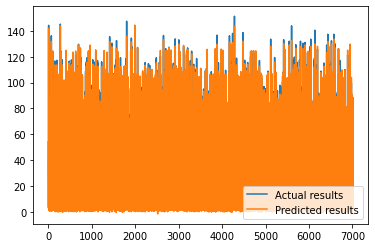

In [23]:
plt.plot(y_test_original, label='Actual results')
plt.plot(y_pred_svr, label='Predicted results')
plt.legend(loc= 'lower right')
plt.show()

## Boxplot of results to show how similar they are in Support Vector Regression

([<matplotlib.axis.XTick at 0x28ac087b160>], [Text(1, 0, 'Test results')])

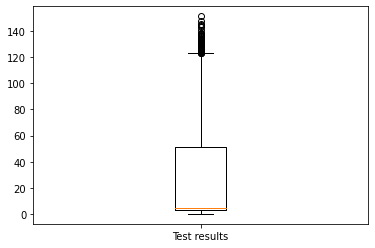

In [24]:
plt.boxplot(y_test_original)
plt.xticks([1], ['Test results'])

([<matplotlib.axis.XTick at 0x28ac08390c0>], [Text(1, 0, 'Predicted results')])

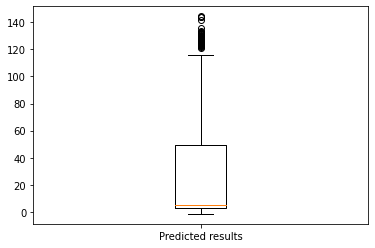

In [25]:
plt.boxplot(y_pred_svr)
plt.xticks([1], ['Predicted results'])